In [4]:
%matplotlib inline 
%run functions.py

def plotMagDeltas(observations):
    xs = [pd.to_datetime(d) for d in observations.when]

    plt.rcParams['figure.figsize'] = (15, 5);
    plt.scatter(xs, observations.magDelta);
    plt.xlim(xs[0], xs[len(xs) - 1]);
    plt.gca().invert_yaxis();
    



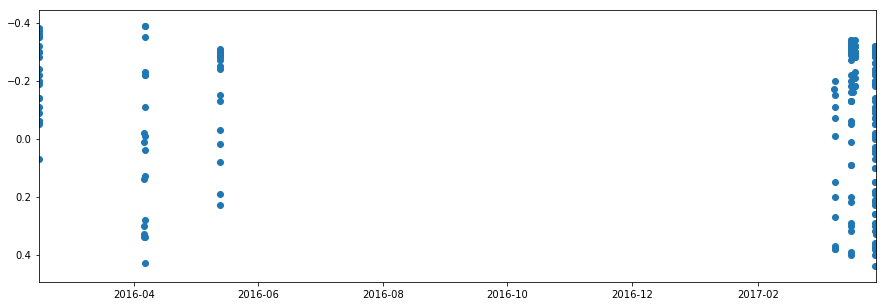

In [5]:
data = pd.read_csv('Thirouin et al.csv')

def timeFromJD(t):
    return Time(t, format='jd')

data['time'] = data.JD.apply(timeFromJD)
data['when'] = data.apply(lambda row: row.time.datetime.strftime('%Y-%b-%d %H:%M:%S'), axis=1)
data['timestamp'] = data.apply(lambda row: row.time.jd, axis=1)

plotMagDeltas(data)

In [6]:
from astropy.stats import LombScargle
import astropy.units as u

def naiveLombScargle(observations):
    a = observations.timestamp.values
    startTimestamp = a[0] #datetime.fromtimestamp(a[0])
    #a = [((datetime.fromtimestamp(x)-startTimestamp).total_seconds() / 3600) for x in a]
    a = a - a[0]
    #a = a * u.hour
    #a = a * u.day
    b = observations.magDelta.values
    freq, power = LombScargle(a, b).autopower(nyquist_factor=100)

    plt.rcParams['figure.figsize'] = (15, 5);
    plt.figure();
    plt.plot(1/freq, power);
    plt.xlim(0,2);

    best_frequency = freq[np.argmax(power)]

    print('Best frequency (cycles per day) = ', best_frequency)
    print('Best period (hours) = ', (1/best_frequency) * 24)
    
    #t_fit = np.linspace(0*u.hour,1000*u.hour)
    #y_fit = LombScargle(a, b).model(t_fit, best_frequency)
    
    #plt.plot(y_fit);

Best frequency (cycles per day) =  4.04275207269
Best period (hours) =  5.93655004524


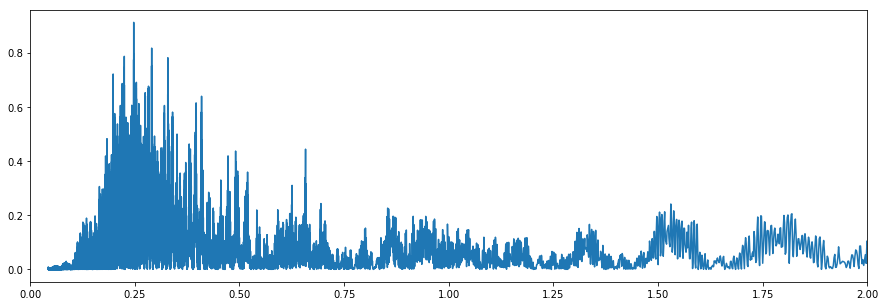

In [7]:
relevantObservations = data
#relevantObservations = data.loc[data['when'] > '2016']

naiveLombScargle(relevantObservations)